<a href="https://colab.research.google.com/github/RostislavB74/NN_HW9/blob/main/GoIT_HW_9_020324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
import itertools
%matplotlib inline
from keras import optimizers
from keras.optimizers import Adam, RMSprop, SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
#Завантажуємо Датасет
from keras.datasets import fashion_mnist

Параметри

In [52]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 28*28 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.0001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 512 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару
n_hidden_3 = 128 # кількість нейронів 2-го шару

In [35]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [36]:
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

In [45]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.3),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [53]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.3),
    keras.layers.Dense(n_hidden_3, activation='relu', name='3nd_layer'),
    Dropout(0.3),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [63]:
model_2.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [64]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 3nd_layer (Dense)           (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)              

In [66]:
model_2.save('2_model')

In [46]:

optimizer = Adam(learning_rate=learning_rate)
model_1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136

In [48]:
model_1.save('1_model')

In [ ]:
# model_t1= keras.models.load_model("1_model")
# history = model_t1.fit(x_train_1, y_train_1, batch_size=128, epochs=10, validation_split=0.2, verbose=1)


In [49]:
model_t1= keras.models.load_model("1_model")
history = model_t1.fit(x_train_1, y_train_1, batch_size=512, epochs=30, validation_split=0.2, verbose=1)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Accuracy:", final_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Epoch 1/30
94/94 [==============================] - 2s 18ms/step - loss: 1.7380 - accuracy: 0.0890 - val_loss: 1.0503 - val_accuracy: 0.1231
Epoch 2/30
94/94 [==============================] - 2s 22ms/step - loss: 1.0234 - accuracy: 0.1087 - val_loss: 0.7450 - val_accuracy: 0.1088
Epoch 3/30
94/94 [==============================] - 1s 14ms/step - loss: 0.8169 - accuracy: 0.1066 - val_loss: 0.6368 - val_accuracy: 0.1115
Epoch 4/30
94/94 [==============================] - 1s 13ms/step - loss: 0.7119 - accuracy: 0.1066 - val_loss: 0.5784 - val_accuracy: 0.1103
Epoch 5/30
94/94 [==============================] - 1s 13ms/step - loss: 0.6533 - accuracy: 0.1058 - val_loss: 0.5417 - val_accuracy: 0.1053
Epoch 6/30
94/94 [==============================] - 1s 14ms/step - loss: 0.6073 - accuracy: 0.1054 - val_loss: 0.5124 - val_accuracy: 0.1118
Epoch 7/30
94/94 [==============================] - 1s 14ms/step - loss: 0.5808 - accuracy: 0.1058 - val_loss: 0.4927 - val_accuracy: 0.1109
Epoch 8/30
94

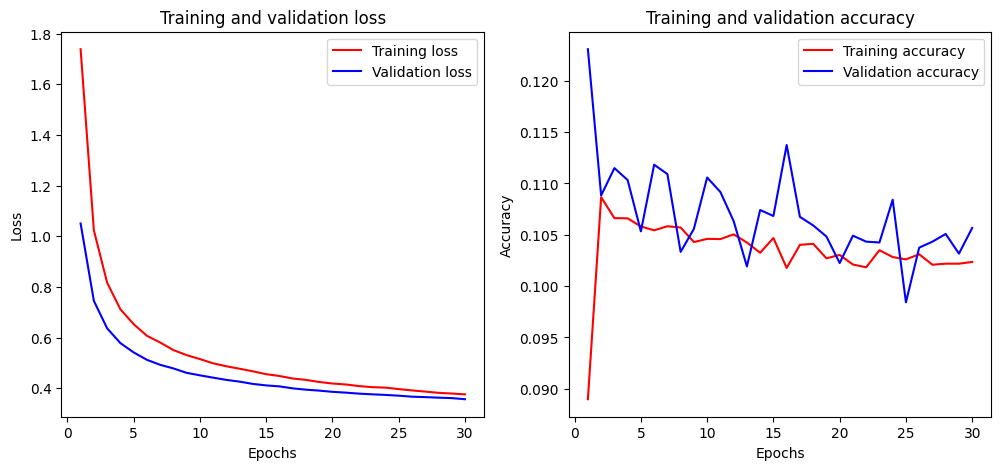

In [50]:
# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Мысли вслух.
як краще підходити до задачі.

Виникла ідея розбити тренувальний датасет на два класи
1. одежа
2. взуття
3. аксесуари
4. потім все ж таки об'єднати взуття та аксесуари разом.

провести тренування


In [22]:
from sklearn.model_selection import train_test_split

# Розділити дані на два класи: одяг і взуття та аксесуари
clothing_indices = np.where((y_train >= 0) & (y_train <= 6))[0]
shoe_accessory_indices = np.where((y_train == 7) | (y_train == 8) | (y_train == 9))[0]

# Створити підмасиви даних для кожного підкласу
clothing_data = x_train[clothing_indices]
shoe_accessory_data = x_train[shoe_accessory_indices]

# Відповідні мітки класів
y_train_clothing = y_train[clothing_indices]
y_train_shoe_accessory = y_train[shoe_accessory_indices]

# Перевірити розмір кожного підмасиву
print("Розмір підмасиву одягу:", clothing_data.shape)
print("Розмір підмасиву взуття та аксесуарів:", shoe_accessory_data.shape)


Розмір підмасиву одягу: (42000, 28, 28)
Розмір підмасиву взуття та аксесуарів: (18000, 28, 28)


In [24]:
import numpy as np

# Функція для генерації шуму
def generate_noise(size):
    noise = np.random.randn(size, 28, 28)
    return noise

# Згенеруємо шум для кожного класу
noise_clothing = generate_noise(18000)  # для одягу
noise_shoe_accessory = generate_noise(42000)  # для взуття та аксесуарів

# Додамо шум до відповідних підмасивів
clothing_data_noisy = np.concatenate((clothing_data, noise_clothing), axis=0)
shoe_accessory_data_noisy = np.concatenate((shoe_accessory_data, noise_shoe_accessory), axis=0)

# Перевіримо розміри
print("Розмір підмасиву одягу з шумом:", clothing_data_noisy.shape)
print("Розмір підмасиву взуття та аксесуарів з шумом:", shoe_accessory_data_noisy.shape)


Розмір підмасиву одягу з шумом: (60000, 28, 28)
Розмір підмасиву взуття та аксесуарів з шумом: (60000, 28, 28)


In [25]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam, RMSprop, SGD

# Перша модель з оптимізатором Adam
model_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Друга модель з оптимізатором RMSprop
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_2.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Третя модель з оптимізатором SGD
model_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_3.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Зберігання моделей
model_1.save('model_1.h5')
model_2.save('model_2.h5')
model_3.save('model_3.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# # Розділити дані на два класи: одяг і взуття та аксесуари
# clothing_indices = np.where((y_train >= 0) & (y_train <= 6))[0]
# shoe_accessory_indices = np.where((y_train == 7) | (y_train == 8) | (y_train == 9))[0]

# # Створити підмасиви даних для кожного підкласу
# clothing_data = x_train[clothing_indices]
# shoe_accessory_data = x_train[shoe_accessory_indices]

# # Перевірити розмір кожного підмасиву
# print("Розмір підмасиву одягу:", clothing_data.shape)
# print("Розмір підмасиву взуття та аксесуарів:", shoe_accessory_data.shape)


Розмір підмасиву одягу: (42000, 28, 28)
Розмір підмасиву взуття та аксесуарів: (18000, 28, 28)


In [18]:
import numpy as np

def add_noise(images, noise_level=0.5):
    noisy_images = images + np.random.normal(loc=0, scale=noise_level, size=images.shape)
    noisy_images = np.clip(noisy_images, 0, 1)  # Обмеження значень до діапазону [0, 1]
    return noisy_images





In [ ]:
# Нормалізація тестових даних
x_test_clothing_norm = clothing_data/ 255.0
x_test_shoe_accessory_norm = shoe_accessory_data / 255.0

# Тестові дані для одягу
x_test_clothing, y_test_clothing = x_test_clothing_norm, y_test

# Тестові дані для взуття та аксесуарів
x_test_shoe_accessory, y_test_shoe_accessory = x_test_shoe_accessory_norm, y_test

In [ ]:
from sklearn.model_selection import train_test_split

# Нормалізація даних
x_train_clothing_norm = clothing_data / 255.0
x_train_shoe_accessory_norm = shoe_accessory_data / 255.0


# Розділити дані на тренувальний та валідаційний сет
x_train_clothing, x_val_clothing, y_train_clothing, y_val_clothing = train_test_split(x_train_clothing_norm, y_train[clothing_indices], test_size=0.2, random_state=42)
x_train_shoe_accessory, x_val_shoe_accessory, y_train_shoe_accessory, y_val_shoe_accessory = train_test_split(x_train_shoe_accessory_norm, y_train[shoe_accessory_indices], test_size=0.2, random_state=42)

# Тренування моделі на тренувальних сетах
history_clothing = model.fit(x_train_clothing, y_train_clothing, batch_size=32, epochs=10, validation_data=(x_val_clothing, y_val_clothing))
history_shoe_accessory = model.fit(x_train_shoe_accessory, y_train_shoe_accessory, batch_size=32, epochs=10, validation_data=(x_val_shoe_accessory, y_val_shoe_accessory))



Epoch 1/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.4765 - accuracy: 0.8448 - val_loss: 0.3335 - val_accuracy: 0.8768
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3317 - accuracy: 0.8763 - val_loss: 0.3222 - val_accuracy: 0.8801
Epoch 3/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3243 - accuracy: 0.8782 - val_loss: 0.3221 - val_accuracy: 0.8788
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3153 - accuracy: 0.8816 - val_loss: 0.3192 - val_accuracy: 0.8813
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3126 - accuracy: 0.8801 - val_loss: 0.3286 - val_accuracy: 0.8769
Epoch 6/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3136 - accuracy: 0.8810 - val_loss: 0.3160 - val_accuracy: 0.8823
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3075 - accuracy: 0.8819 - val_loss: 0.3260 - val_accuracy:

In [ ]:
model.save('model_new')

In [ ]:
model_all= keras.models.load_model("model_new")
loss_clothing, accuracy_clothing = model_all.evaluate(x_test_clothing / 255.0, y_test)
loss_shoe_accessory, accuracy_shoe_accessory = model_all.evaluate(x_test_shoe_accessory / 255.0, y_test)


ValueError: Data cardinality is ambiguous:
  x sizes: 42000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [ ]:
# # Оцінка моделі на тестових даних
# model_all= keras.models.load_model("model_new")
# # loss_clothing, accuracy_clothing = model_all.evaluate(x_test[clothing_indices] / 255.0, y_test[clothing_indices])
# loss_shoe_accessory, accuracy_shoe_accessory = model_all.evaluate(x_test[shoe_accessory_indices] / 255.0, y_test[shoe_accessory_indices])

# print("Clothing Test Accuracy:", accuracy_clothing)
# print("Shoe and Accessory Test Accuracy:", accuracy_shoe_accessory)

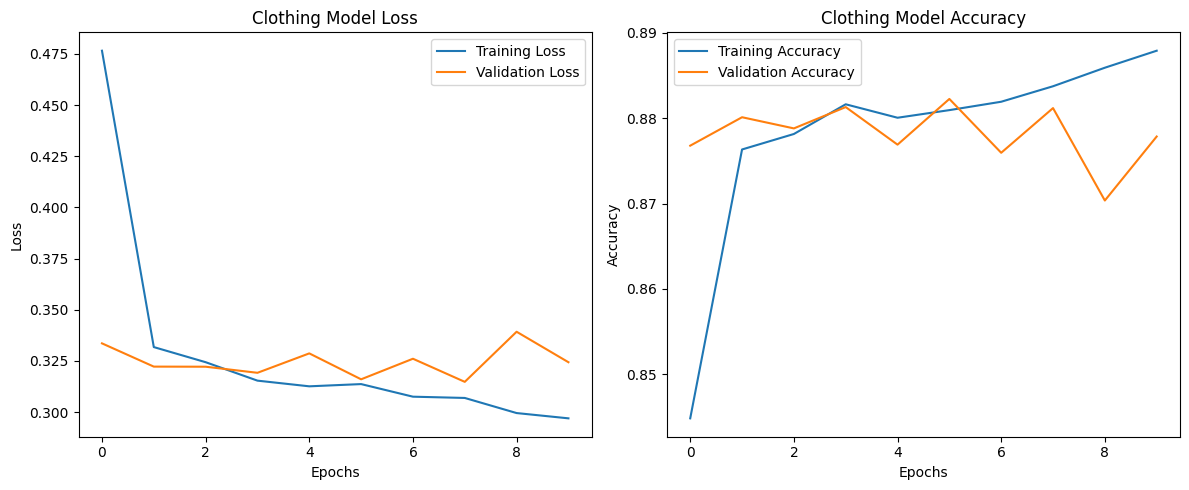

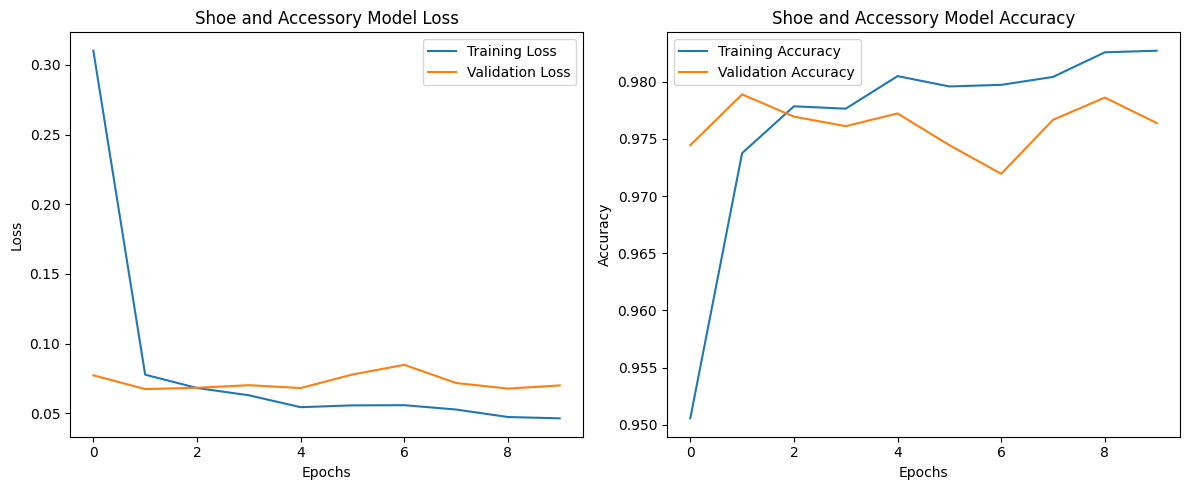

In [ ]:
import matplotlib.pyplot as plt

# Побудова графіків для класу одягу
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_clothing.history['loss'], label='Training Loss')
plt.plot(history_clothing.history['val_loss'], label='Validation Loss')
plt.title('Clothing Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_clothing.history['accuracy'], label='Training Accuracy')
plt.plot(history_clothing.history['val_accuracy'], label='Validation Accuracy')
plt.title('Clothing Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Побудова графіків для класу взуття та аксесуарів
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_shoe_accessory.history['loss'], label='Training Loss')
plt.plot(history_shoe_accessory.history['val_loss'], label='Validation Loss')
plt.title('Shoe and Accessory Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_shoe_accessory.history['accuracy'], label='Training Accuracy')
plt.plot(history_shoe_accessory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Shoe and Accessory Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Розділити дані на три класи: взуття, одяг і аксесуари
shoe_indices = np.where((y_train == 7) | (y_train == 9))[0]
clothing_indices = np.where((y_train >= 0) & (y_train <= 6))[0]
accessory_indices = np.where(y_train == 8)[0]

# Створити підмасиви даних для кожного класу
shoe_data = x_train[shoe_indices]
clothing_data = x_train[clothing_indices]
accessory_data = x_train[accessory_indices]

# Перевірити розмір кожного підмасиву
print("Розмір підмасиву взуття:", shoe_data.shape)
print("Розмір підмасиву одягу:", clothing_data.shape)
print("Розмір підмасиву аксесуарів:", accessory_data.shape)



Розмір підмасиву взуття: (12000, 28, 28)
Розмір підмасиву одягу: (42000, 28, 28)
Розмір підмасиву аксесуарів: (6000, 28, 28)


In [ ]:
# Виведення міток для кожного класу
shoe_labels = y_train[shoe_indices]
clothing_labels = y_train[clothing_indices]
accessory_labels = y_train[accessory_indices]

print("Мітки взуття:", shoe_labels)
print("Мітки одягу:", clothing_labels)
print("Мітки аксесуарів:", accessory_labels)


Мітки взуття: [9 7 9 ... 9 7 7]
Мітки одягу: [0 0 3 ... 3 0 5]
Мітки аксесуарів: [8 8 8 ... 8 8 8]


In [ ]:
# Визначення кількості міток для кожного класу
num_shoe_labels = shoe_labels.shape[0]
num_clothing_labels = clothing_labels.shape[0]
num_accessory_labels = accessory_labels.shape[0]

print("Кількість міток взуття:", num_shoe_labels)
print("Кількість міток одягу:", num_clothing_labels)
print("Кількість міток аксесуарів:", num_accessory_labels)


Кількість міток взуття: 12000
Кількість міток одягу: 42000
Кількість міток аксесуарів: 6000


In [ ]:
import numpy as np

# Підрахунок кількості міток для кожного класу в датасеті взуття
shoe_label_counts = np.bincount(shoe_labels)
print("Кількість міток для кожного класу взуття:")
for i, count in enumerate(shoe_label_counts):
    print(f"Клас {i}: {count} міток")

# Аналогічно для інших датасетів (одягу і аксесуарів)


Кількість міток для кожного класу взуття:
Клас 0: 0 міток
Клас 1: 0 міток
Клас 2: 0 міток
Клас 3: 0 міток
Клас 4: 0 міток
Клас 5: 0 міток
Клас 6: 0 міток
Клас 7: 6000 міток
Клас 8: 0 міток
Клас 9: 6000 міток


In [ ]:
clothing_label_counts = np.bincount(clothing_labels)
print("Кількість міток для кожного класу одежа:")
for i, count in enumerate(clothing_label_counts):
    print(f"Клас {i}: {count} міток")

Кількість міток для кожного класу одежа:
Клас 0: 6000 міток
Клас 1: 6000 міток
Клас 2: 6000 міток
Клас 3: 6000 міток
Клас 4: 6000 міток
Клас 5: 6000 міток
Клас 6: 6000 міток


In [ ]:
accessory_label_counts = np.bincount(accessory_labels)
print("Кількість міток для кожного класу аксесуари:")
for i, count in enumerate(accessory_label_counts):
    print(f"Клас {i}: {count} міток")

Кількість міток для кожного класу аксесуари:
Клас 0: 0 міток
Клас 1: 0 міток
Клас 2: 0 міток
Клас 3: 0 міток
Клас 4: 0 міток
Клас 5: 0 міток
Клас 6: 0 міток
Клас 7: 0 міток
Клас 8: 6000 міток


In [ ]:
# Об'єднати дані для взуття та аксесуарів
combined_data = np.concatenate((shoe_data, accessory_data), axis=0)

# Створити мітки для об'єднаних даних
combined_labels = np.concatenate((shoe_labels, accessory_labels), axis=0)

# Перевірити розмір об'єднаних даних та міток
print("Розмір об'єднаних даних:", combined_data.shape)
print("Розмір об'єднаних міток:", combined_labels.shape)


Розмір об'єднаних даних: (18000, 28, 28)
Розмір об'єднаних міток: (18000,)


In [ ]:
type(combined_data)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split

# Розбиття даних на тренувальні та тестові набори
x_train_comb, x_test_comb, y_train_comb, y_test_comb = train_test_split(combined_data, combined_labels, test_size=0.2, random_state=42)

# Виведення розмірності тренувальних та тестових наборів даних
print("Розмір x_train_comb:", x_train_comb.shape)
print("Розмір x_test_comb:", x_test_comb.shape)
print("Розмір y_train_comb:", y_train_comb.shape)
print("Розмір y_test_comb:", y_test_comb.shape)


Розмір x_train_comb: (14400, 28, 28)
Розмір x_test_comb: (3600, 28, 28)
Розмір y_train_comb: (14400,)
Розмір y_test_comb: (3600,)


In [ ]:
x_train_comb

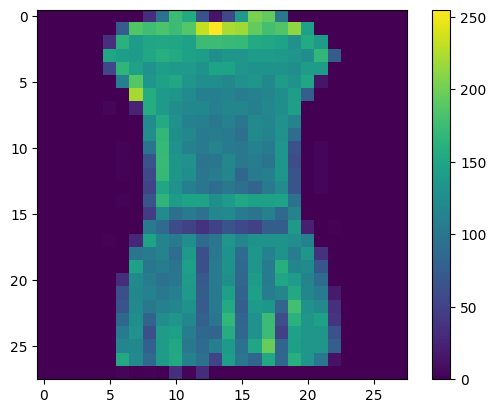

In [ ]:
plt.figure()
plt.imshow(clothing_data[2])
plt.colorbar()
plt.grid(False)


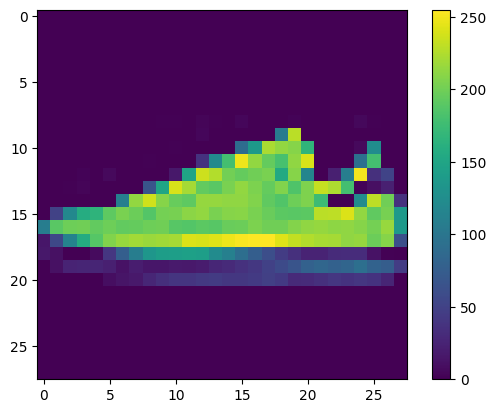

In [ ]:
plt.figure()
plt.imshow(combined_data[1])
plt.colorbar()
plt.grid(False)

In [ ]:
# Перемішаємо тренувальні дані
train_data_comb = tf.data.Dataset.from_tensor_slices((x_train_comb, y_train_comb))
train_data_comb = train_data_comb.repeat().shuffle(10).batch(batch_size).prefetch(1)

In [ ]:
x_train_comb_normalized = x_train_comb / 255.0
x_test_normalized = x_test / 255.0
# x_train_1, x_test_1 = x_train / 255., x_test / 255.
# y_train_1, y_test_1 = y_train, y_test


# ДЗ-9

In [ ]:
# # Перемішаємо тренувальні дані
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

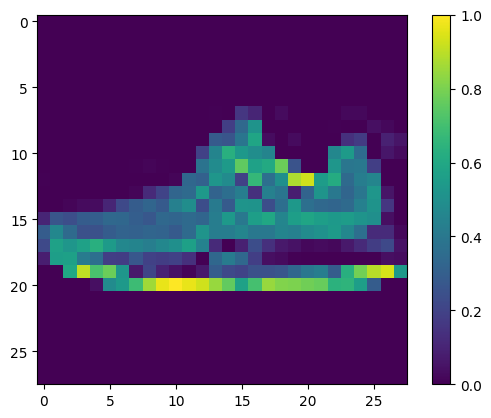

In [ ]:
plt.figure()
plt.imshow(x_train_comb_normalized[15])
plt.colorbar()
plt.grid(False)

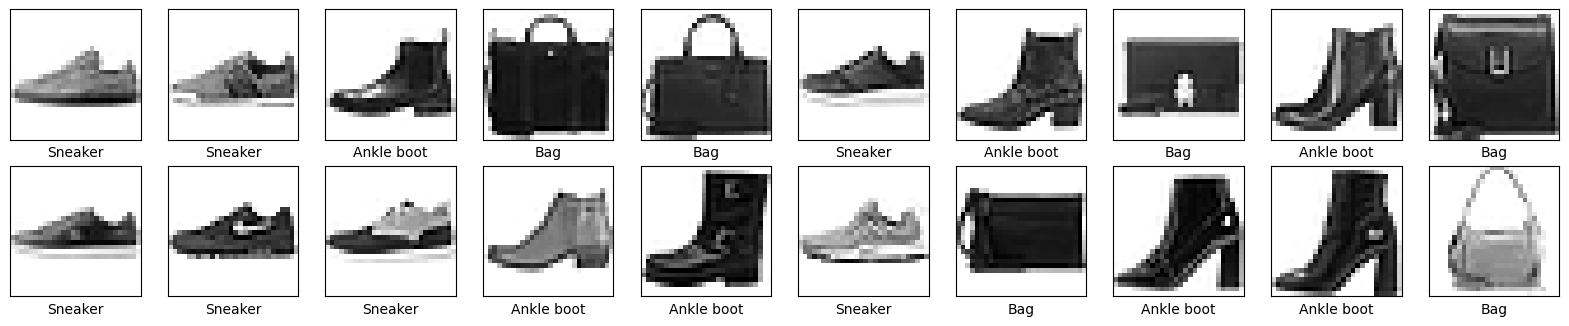

In [ ]:
plt.figure(figsize=(20,20))
for i in range(20):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_comb_normalized[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_comb[i]])

In [ ]:
model_comb = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.3),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [ ]:
# model_comb.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:


# Задати швидкість навчання
learning_rate = 0.001

# Створити оптимізатор Adam з вказаною швидкістю навчання
optimizer = Adam(learning_rate=learning_rate)

# Компіляція моделі з використанням оптимізатора
model_comb.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model_comb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 13607

In [ ]:
model_comb.save('comb_model')

In [ ]:
# history=model.fit(x_train_1, y_train_1, batch_size=32, epochs=20, validation_split=0.2)
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=0)
model_c= keras.models.load_model("comb_model")
history = model_c.fit(x_train_1, y_train_1, batch_size=128, epochs=10, validation_split=0.2, verbose=1)

# Отримання історії навчання
loss_comb = history.history['loss']
val_loss_comb = history.history['val_loss']
accuracy_comb = history.history['accuracy']
val_accuracy_comb = history.history['val_accuracy']
epochs_comb = range(1, len(loss_comb) + 1)

final_loss_comb = history.history['loss'][-1]
final_val_loss_comb = history.history['val_loss'][-1]
final_accuracy_comb = history.history['accuracy'][-1]
final_val_accuracy_comb = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss_comb)
print("Final Validation Loss:", final_val_loss_comb)
print("Final Accuracy:", final_accuracy_comb)
print("Final Validation Accuracy:", final_val_accuracy_comb)


Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.6694 - accuracy: 0.1085 - val_loss: 0.4250 - val_accuracy: 0.1165
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4525 - accuracy: 0.1041 - val_loss: 0.3820 - val_accuracy: 0.0999
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4118 - accuracy: 0.1023 - val_loss: 0.3781 - val_accuracy: 0.1233
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3897 - accuracy: 0.1019 - val_loss: 0.3455 - val_accuracy: 0.1027
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3742 - accuracy: 0.1027 - val_loss: 0.3405 - val_accuracy: 0.1079
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3575 - accuracy: 0.1025 - val_loss: 0.3442 - val_accuracy: 0.0911
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3474 - accuracy: 0.1028 - val_loss: 0.3357 - val_accuracy: 0.1101
Epoch 

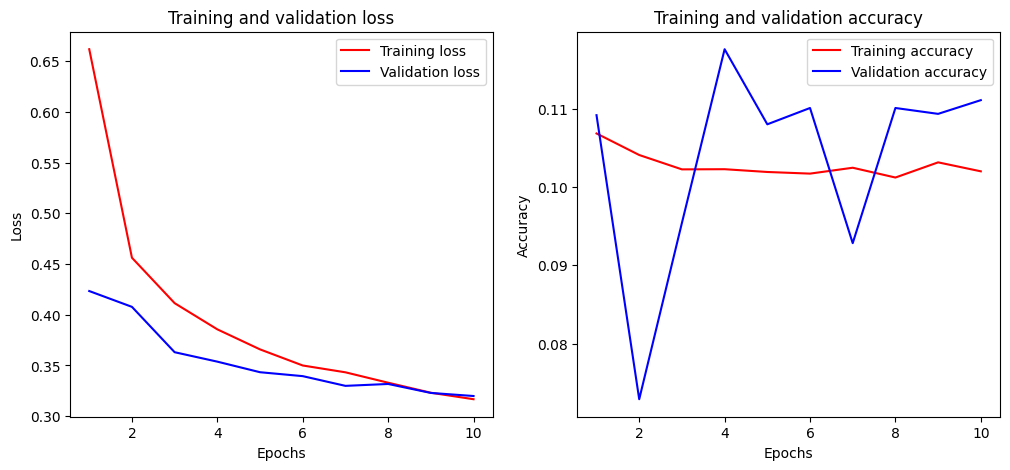

In [ ]:
# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs_comb, loss_comb, 'r', label='Training loss')
plt.plot(epochs_comb, val_loss_comb, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs_comb, accuracy_comb, 'r', label='Training accuracy')
plt.plot(epochs_comb, val_accuracy_comb, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
# Нормалізуємо значення пікселів
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

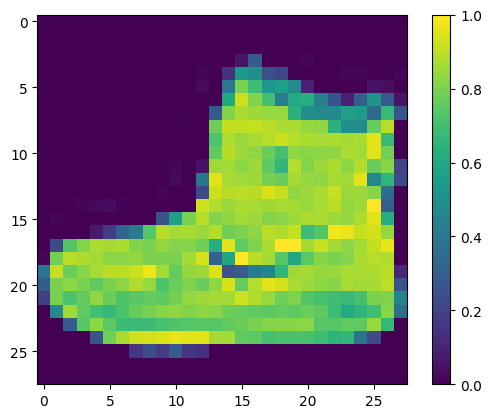

In [ ]:
plt.figure()
plt.imshow(x_train_1[0])
plt.colorbar()
plt.grid(False)

Подивимось датасет частково

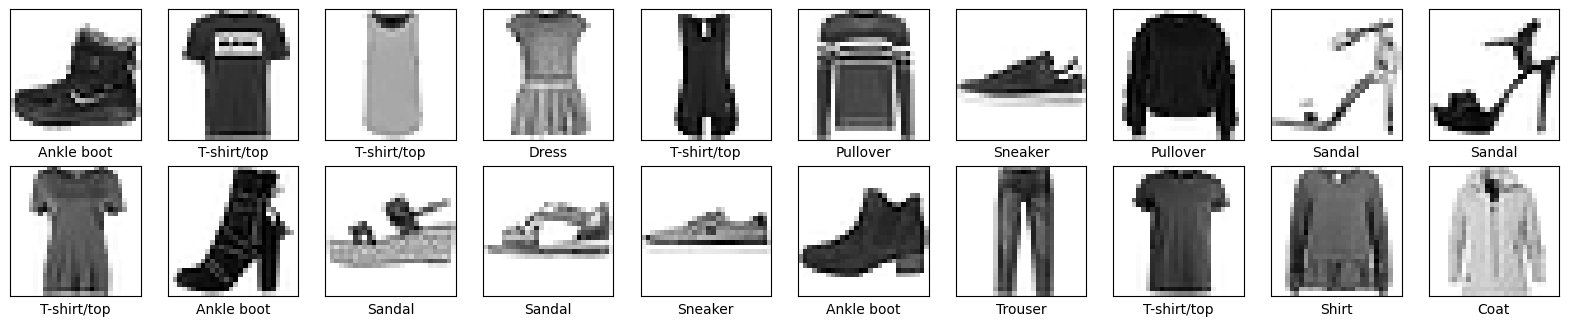

In [ ]:
plt.figure(figsize=(20,20))
for i in range(20):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_1[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_1[i]])


In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.3),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [ ]:
#Копиляція моделі

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136

In [29]:
model.save('model_all')

Epoch 1/20
1500/1500 [==============================] - 11s 6ms/step - loss: 0.9022 - accuracy: 0.1160 - val_loss: 0.5317 - val_accuracy: 0.1085
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5599 - accuracy: 0.1069 - val_loss: 0.4548 - val_accuracy: 0.1107
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4906 - accuracy: 0.1053 - val_loss: 0.4195 - val_accuracy: 0.1025
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4539 - accuracy: 0.1043 - val_loss: 0.4033 - val_accuracy: 0.1098
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4248 - accuracy: 0.1033 - val_loss: 0.3796 - val_accuracy: 0.1194
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4089 - accuracy: 0.1039 - val_loss: 0.3692 - val_accuracy: 0.1123
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3891 - accuracy: 0.1035 - val_loss: 0.3631 - val_accuracy

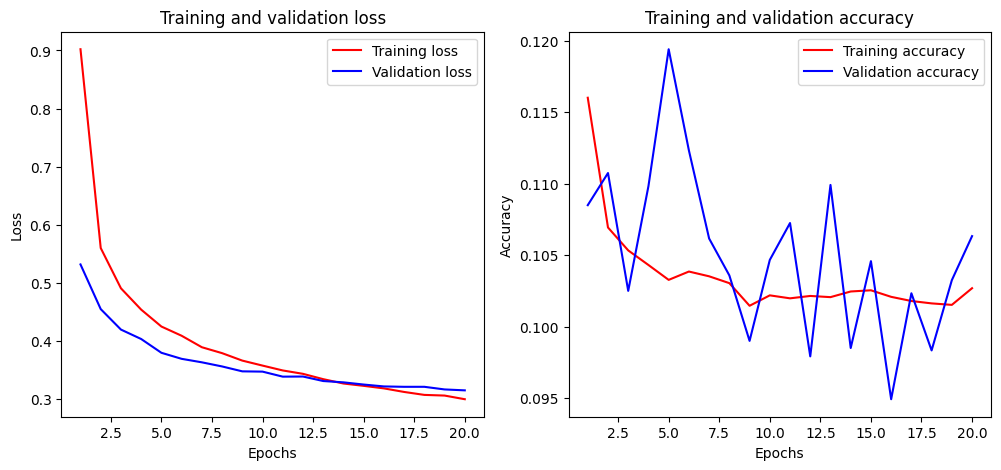

In [31]:
# history=model.fit(x_train_1, y_train_1, batch_size=32, epochs=20, validation_split=0.2)
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=0)
history = model.fit(x_train_1, y_train_1, batch_size=32, epochs=20, validation_split=0.2, verbose=1)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Accuracy:", final_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
test_loss_1, test_acc_1 = model.evaluate(x_test_1, y_test_1)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.8816
Test accuracy: 0.881600022315979
Test loss: 0.3337695300579071


1/1 [==============================] - 0s 40ms/step
[[7.7754448e-16 2.6607658e-15 2.4232279e-15 6.0996282e-13 1.1931096e-14
  8.4266485e-06 1.6035938e-15 9.9999154e-01 3.6392039e-10 3.0345362e-08]]
Предмет що розпізнаний: Sneaker


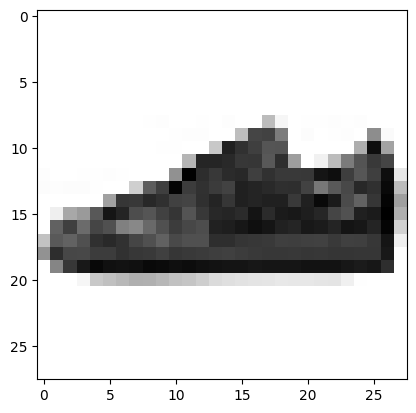

In [ ]:
n=22
x=np.expand_dims(x_test_1[n], axis=0)
res = model.predict(x)
print(res)
print(f'Предмет що розпізнаний: {class_names[np.argmax(res)]}')
plt.imshow(x_test_1[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
predictions = model.predict(x_train_1)

1875/1875 [==============================] - 3s 2ms/step


In [ ]:
predictions[22]

array([2.5079641e-03, 2.6783167e-04, 3.2497722e-01, 2.9108447e-03,
       5.7969475e-01, 3.8979772e-07, 8.6795494e-02, 2.6750578e-07,
       2.8450659e-03, 2.0708656e-07], dtype=float32)

In [ ]:
class_names[np.argmax(predictions[22])]

'Coat'

In [ ]:
class_names[y_train_1[22]]

'Coat'

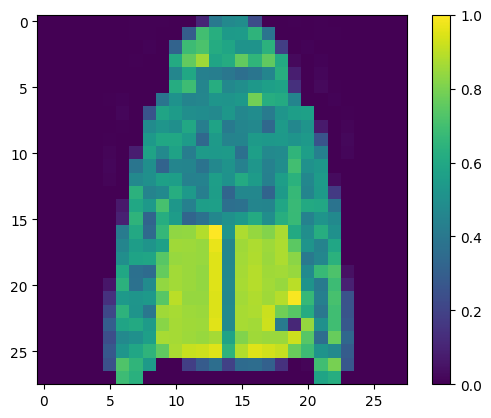

In [ ]:
plt.figure()
plt.imshow(x_train_1[22])
plt.colorbar()
plt.grid(False)

In [ ]:
class_names[np.argmax(predictions[22])]

'Coat'

In [ ]:
predictions_all = model.predict(x_test_1)
predictions_all = np.argmax(predictions_all, axis=1)

predicted_class_names = [class_names[label] for label in predictions_all]
true_class_names = [class_names[label] for label in y_test_1]


313/313 [==============================] - 1s 2ms/step


In [ ]:
from tabulate import tabulate

# Prepare data for the table
table_data = []
for i in range(30):
    predicted_class = predicted_class_names[i]
    true_class = true_class_names[i]
    if predicted_class != true_class:
        table_data.append([f"\033[91m{predicted_class}\033[0m", true_class])
    else:
        table_data.append([predicted_class, true_class])

# Print the table
print(tabulate(table_data, headers=["Predicted Class", "True Class"], tablefmt="fancy_grid"))


╒═══════════════════╤══════════════╕
│ Predicted Class   │ True Class   │
╞═══════════════════╪══════════════╡
│ Ankle boot        │ Ankle boot   │
├───────────────────┼──────────────┤
│ Pullover          │ Pullover     │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│ Sneaker           │ Sneaker      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│

In [ ]:
mask=predictions_all==y_test_1
print(mask[:30])
x_false=x_test_1[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True False
  True False  True  True  True  True]
(1184, 28, 28)


In [ ]:
print(f'Кількість помилкових значень: {len(x_false)}')


Кількість помилкових значень: 1184


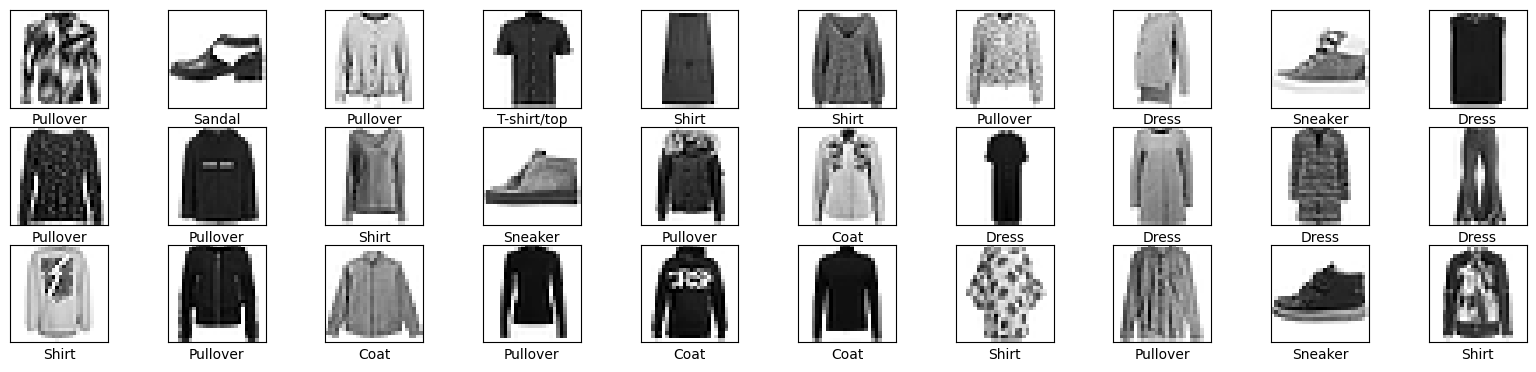

In [ ]:
plt.figure(figsize=(20,15))
for i in range(30):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [ ]:
import numpy as np

# Порівняння прогнозованих міток з правильними мітками
mask = predictions_all != y_test_1

# Отримання помилкових прогнозів та їх правильних міток
x_false = x_test_1[mask]
y_false = y_test_1[mask]

# Підрахунок кількості помилкових класифікацій для кожної цифри
false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"{class_names[digit]}: {count} помилкових класифікацій")

T-shirt/top: 130 помилкових класифікацій
Trouser: 36 помилкових класифікацій
Pullover: 192 помилкових класифікацій
Dress: 84 помилкових класифікацій
Coat: 204 помилкових класифікацій
Sandal: 32 помилкових класифікацій
Shirt: 387 помилкових класифікацій
Sneaker: 28 помилкових класифікацій
Bag: 33 помилкових класифікацій
Ankle boot: 58 помилкових класифікацій


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[870   0  10  30   2   0  84   0   4   0]
 [  2 964   2  27   2   0   2   0   1   0]
 [ 17   2 808  18 108   0  47   0   0   0]
 [ 25   2   6 916  22   0  26   0   3   0]
 [  1   0 102  59 796   0  40   0   2   0]
 [  0   0   0   1   0 968   0  19   1  11]
 [146   0 114  36  81   0 613   0  10   0]
 [  0   0   0   0   0  16   0 972   0  12]
 [  3   0   3   6   4   6   7   4 967   0]
 [  0   0   0   0   0  11   1  46   0 942]]


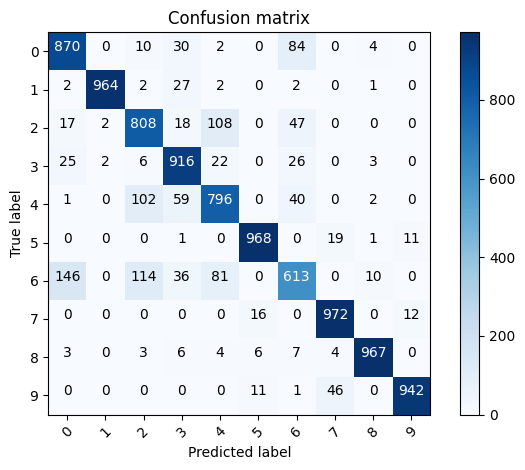

In [ ]:
y_pred = np.argmax(model.predict(x_test_1), axis=1)
cm = confusion_matrix(y_test_1, y_pred)
plot_confusion_matrix(cm, classes=range(10))

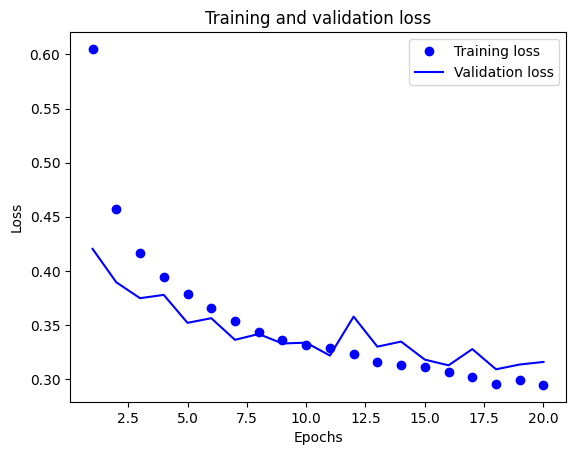

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
